In [66]:
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
usuarios = pd.read_csv('curtidas_cervejarias.csv', encoding = 'ISO-8859-1')

In [3]:
usuarios.tail()

,id,firstName,gender,avenue_id,avenue_name,avenue_categories,avenue_lat,avenue_lng
9257,39991457,Jannis,female,4ced1fd813aea143d326659f,Tavern on the Green,American Restaurant,40.772256,-73.977476
9258,6909884,Carol ðâ,female,4ced1fd813aea143d326659f,Tavern on the Green,American Restaurant,40.772256,-73.977476
9259,3088472,Chase,male,4ced1fd813aea143d326659f,Tavern on the Green,American Restaurant,40.772256,-73.977476
9260,14184080,John,male,4ced1fd813aea143d326659f,Tavern on the Green,American Restaurant,40.772256,-73.977476
9261,2631756,Tokuyuki,male,4ced1fd813aea143d326659f,Tavern on the Green,American Restaurant,40.772256,-73.977476


In [4]:
vc = usuarios['id'].value_counts()

#### Filtra pessoas com mais de 10 likes na base de dados

In [8]:
filter = vc[vc > 2].index.tolist()

In [9]:
unique_users = usuarios[usuarios['id'].isin(filter)][['id', 'firstName', 'gender']].drop_duplicates()

In [10]:
len(unique_users)

399

In [11]:
base = usuarios[usuarios['id'].isin(filter)]

In [12]:
G = nx.Graph()

In [13]:
for u in unique_users.iterrows():
    G.add_node(u[1]['id'], name=u[1]['firstName'], gender=u[1]['gender'])

In [14]:
for u in unique_users.iterrows():
    id = u[1]['id']
    local_id = base[base['id'] == id]
    for local in local_id.iterrows():
        local_id = local[1]['avenue_id']
        for p in base[base['avenue_id'] == local_id].iterrows():
            if p[1]['id'] != id:
                if G.has_edge(id, p[1]['id']):
                    for id1,id2,data in G.edges(data=True):
                        if (id == id1 or id == id2) and (p[1]['id'] == id1 or p[1]['id'] == id2):
                            data['weight'] = data['weight'] + 1
                            break
                else:
                    G.add_edge(id, p[1]['id'], weight=1)

In [15]:
nx.write_gml(G, 'graph_cervejarias.gml')

In [16]:
nx.average_clustering(G, weight='weight')

0.12317125249996777

In [17]:
nx.average_clustering(G)

0.7306890198534539

In [69]:
pos = nx.spring_layout(G)
betCent = nx.eigenvector_centrality_numpy(G, weight='weight')
node_color = [G.degree(v, weight='weight') for v in G]
node_size = [v * 10000 for v in betCent.values()]

(-0.8893702192978932,
 1.0958485355410632,
 -0.8867732380375445,
 0.8762797425050478)

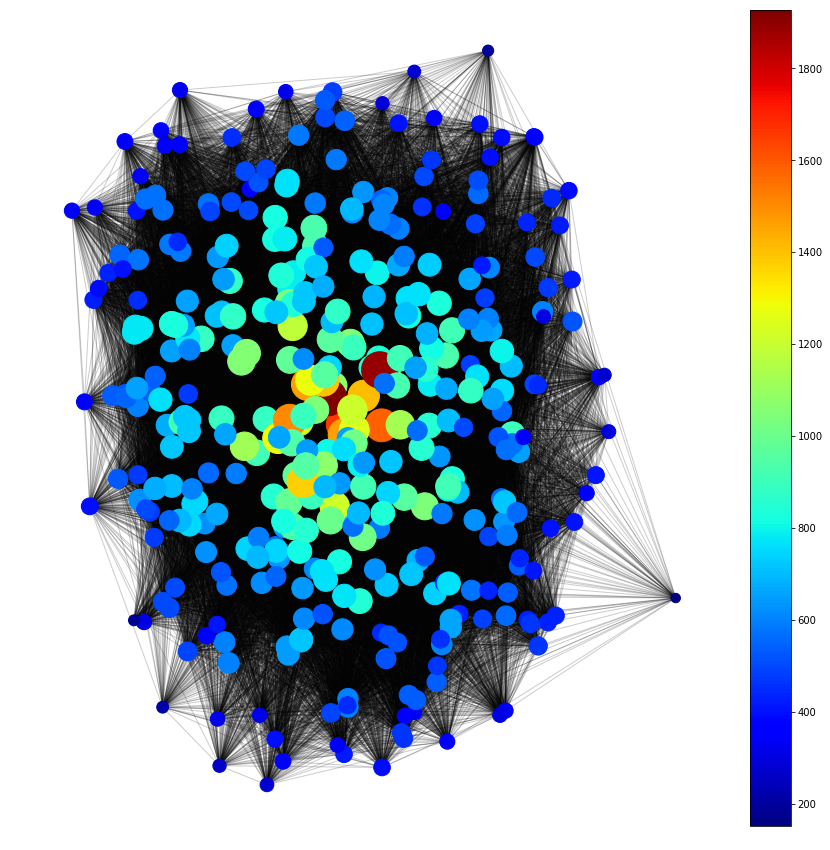

In [71]:
plt.figure(figsize=(15,15))
nodes = G.nodes()
ed = nx.draw_networkx_edges(G, pos=pos, alpha=0.2)
no = nx.draw_networkx_nodes(G, pos=pos, with_labels=False, node_color=node_color, 
                         nodelist=nodes,
                         node_size=node_size, cmap=plt.cm.jet)
plt.colorbar(no)
plt.axis('off')